## 3. Data Analyst - Run SQL on tables and plot data

In [12]:
from google.cloud import bigquery

client = bigquery.Client()

In [13]:
%%bigquery
SELECT 
    Deposit,
    COUNT(*) as count
FROM `datalake-vol2.datalake_vol2_raw.banking_marketing_train`
GROUP BY Deposit

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.75rows/s]


,Deposit,count
0,1,36009
1,2,4771


In [14]:
%%bigquery
SELECT 
    Job, 
    AVG(Age) as avg_age,
    AVG(Balance) as avg_balance
FROM `datalake-vol2.datalake_vol2_raw.banking_marketing_train`
GROUP BY JOB
ORDER BY avg_age DESC

Downloading: 100%|██████████| 12/12 [00:00<00:00, 12.16rows/s]


,Job,avg_age,avg_balance
0,retired,61.663075,2043.784035
1,unknown,47.494424,1735.271375
2,housemaid,46.418522,1398.580588
3,entrepreneur,42.122189,1499.867316
4,unemployed,40.986452,1500.280271
5,management,40.468867,1763.349697
6,self-employed,40.349894,1663.105039
7,blue-collar,40.051578,1084.207113
8,technician,39.338529,1252.486672
9,admin.,39.315271,1147.316556


### Spark to Pandas DataFrame

Enable Apache Arrow to allow faster conversion from Spark DataFrame to Pandas DataFrame.

In [15]:
sql = """
SELECT 
    Job, 
    AVG(Age) as avg_age,
    AVG(Balance) as avg_balance
FROM `datalake-vol2.datalake_vol2_raw.banking_marketing_train`
GROUP BY JOB
ORDER BY avg_age DESC
"""

In [16]:
df_jobs = client.query(sql).to_dataframe()

In [17]:
type(df_jobs)

pandas.core.frame.DataFrame

In [18]:
df_jobs.head()

,Job,avg_age,avg_balance
0,retired,61.663075,2043.784035
1,unknown,47.494424,1735.271375
2,housemaid,46.418522,1398.580588
3,entrepreneur,42.122189,1499.867316
4,unemployed,40.986452,1500.280271


### Plot data using Pandas Plotting

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Job'>

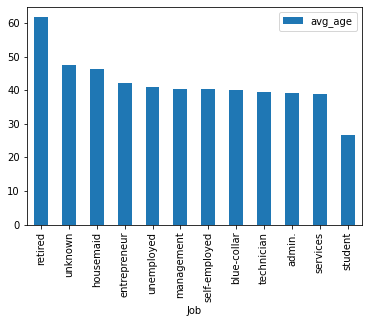

In [20]:
df_jobs.plot.bar(x='Job', y='avg_age', rot=90)

In [21]:
df_jobs.set_index('Job', inplace=True)
df_jobs.head()

,avg_age,avg_balance
Job,,
retired,61.663075,2043.784035
unknown,47.494424,1735.271375
housemaid,46.418522,1398.580588
entrepreneur,42.122189,1499.867316
unemployed,40.986452,1500.280271


array([<AxesSubplot:title={'center':'avg_age'}, xlabel='Job'>,
       <AxesSubplot:title={'center':'avg_balance'}, xlabel='Job'>],
      dtype=object)

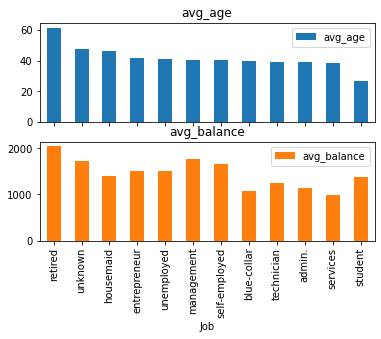

In [22]:
df_jobs.plot.bar(rot=90, subplots=True)